# Unit 5 - Financial Planning

In [1]:
""" Financial Planning.

Here is a financial analysis application to assist in personal finance planner. 
This prototype perform saving health analysis and retirement planning using Monte Carlo stimulation.
This tool uses the best use of Alpaca API to fetch historical closing prices for a retirement portfolio and free Crypto investments API.
    *The Personal Finance Planner includes Savings Health Analysis.
    *The Retirement Planning uses the MCForecastTools toolkit to create Monte Carlo simulations to project the portfolio performance at 30 years.
    *Also, plot the simulation results and the probability distribution/confidence intervals.
    *The fetches the summary statistics from the Monte Carlo simulation results.
    *The calculates the expected portfolio return at the 95% lower and upper confidence intervals based on a 50% increase in the initial investment.
"""

# Initial imports
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
from datetime import datetime, timedelta

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
response_btc_data = requests.get(btc_url)
btc_data = response_btc_data.json()

# Use json.dumps with argument indent=4 to format data
print(json.dumps(btc_data, indent=4))

# Fetch current ETH price
response_eth_data = requests.get(eth_url)

eth_data = response_eth_data.json()
print(json.dumps(eth_data, indent=4))

# Compute current value of my crpto
my_btc_value = my_btc * btc_data["data"]["1"]["quotes"]["USD"]["price"]
my_eth_value = my_eth * eth_data["data"]["1027"]["quotes"]["USD"]["price"]

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18990456,
            "total_supply": 18990456,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 42870.0,
                    "volume_24h": 26650008065,
                    "market_cap": 813666137782,
                    "percentage_change_1h": -0.308573732506117,
                    "percentage_change_24h": 4.78897354393063,
                    "percentage_change_7d": 8.06813397712252,
                    "percent_change_1h": -0.308573732506117,
                    "percent_change_24h": 4.78897354393063,
                    "percent_change_7d": 8.06813397712252
                },
                "CAD": {
                    "price": 54033.348,
                    "volume_24h": 33589670165.126,
                    "ma

### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
type(alpaca_api_key)
type(alpaca_secret_key)

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

alpaca

In [8]:
# Format current date as ISO format
# end= pd.Timestamp.today(tz="America/Chicago").isoformat()
# start = datetime.now() + timedelta(days=-1000)
# start = pd.Timestamp(end,tz="America/Chicago").isoformat()
start = pd.Timestamp("2022-03-01", tz="America/New_York").isoformat()
end = pd.Timestamp("2022-03-18", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1Day" 

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start,
    end
).df

# Preview DataFrame
df_portfolio

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2022-03-01 05:00:00+00:00,110.600,111.1700,110.5700,110.82,14248500,39215,110.836369,AGG
2022-03-02 05:00:00+00:00,110.310,110.3800,109.4600,109.49,8489288,27605,109.930996,AGG
2022-03-03 05:00:00+00:00,109.785,110.0000,109.6500,109.86,15479351,47775,109.822045,AGG
2022-03-04 05:00:00+00:00,110.380,110.5500,110.2250,110.30,8116629,26863,110.381556,AGG
2022-03-07 05:00:00+00:00,109.850,110.1400,109.6400,109.66,12474681,35203,109.871205,AGG
2022-03-08 05:00:00+00:00,109.230,109.3301,109.1201,109.27,8639904,25293,109.234523,AGG
2022-03-09 05:00:00+00:00,109.090,109.2090,108.9300,109.04,9873754,29005,109.058720,AGG
2022-03-10 05:00:00+00:00,108.650,108.6800,108.2500,108.43,13646915,42329,108.417461,AGG
2022-03-11 05:00:00+00:00,108.440,108.5500,108.3400,108.41,10662625,29475,108.421874,AGG


In [9]:
# Pick AGG and SPY close prices
spy_bars = df_portfolio.loc[df_portfolio["symbol"] == "SPY"]
agg_bars = df_portfolio.loc[df_portfolio["symbol"] == "AGG"]

spy_close_price = spy_bars.tail(1).close.values
agg_close_price = agg_bars.tail(1).close.values

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $[108.1]
Current SPY closing price: $[444.52]


In [10]:
# Compute the current value of shares
my_spy_value = float(my_spy * spy_close_price)
my_agg_value = float(my_agg * agg_close_price)

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $22226.00
The current value of your 200 AGG shares is $21620.00


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income = 12000
total_crypto_value = my_btc_value + my_eth_value
total_shares_value = my_spy_value + my_agg_value

# Consolidate financial assets data
assets_data = {
    "amount": [total_crypto_value, total_shares_value]
}

# Set the tickers
tickers = ["Crypto", "Shares"]

# Create savings DataFrame
df_savings = pd.DataFrame(assets_data, index=tickers)

# Display savings DataFrame
display(df_savings)

,amount
Crypto,67424.454
Shares,43846.000


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

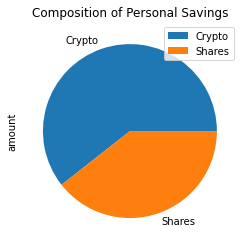

In [12]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Composition of Personal Savings")

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3
##print(emergency_fund)

# Calculate total amount of savings
total_savings = total_crypto_value + total_shares_value
##print(total_savings)

# Validate saving health
if (total_savings > emergency_fund):
    print("Congratulations you have enough money in the fund")
elif (total_savings == emergency_fund):
    print("Congratulations on reaching the financial goal")
else: 
    deficit = emergency_fund - total_savings
    print(f"You are ${deficit} away from reaching the goal")

Congratulations you have enough money in the fund


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1Day" 

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_stock_data = alpaca.get_bars(
    tickers,
    timeframe,
    start_date,
    end_date
).df

# Preview DataFrame
df_stock_data

# Display sample data
df_stock_data.head()
df_stock_data.drop(['volume','trade_count','vwap'], axis=1, inplace=True)
df_stock_data.head()

,open,high,low,close,symbol
timestamp,,,,,
2016-05-02 04:00:00+00:00,110.74,110.7400,110.5200,110.605,AGG
2016-05-03 04:00:00+00:00,110.89,110.9450,110.7500,110.810,AGG
2016-05-04 04:00:00+00:00,110.91,110.9315,110.7595,110.860,AGG
2016-05-05 04:00:00+00:00,110.92,111.1600,110.8010,111.140,AGG
2016-05-06 04:00:00+00:00,111.12,111.1200,110.9700,110.970,AGG


In [16]:
retirement_spy_bars = df_stock_data.loc[df_stock_data["symbol"] == "SPY"]
retirement_agg_bars = df_stock_data.loc[df_stock_data["symbol"] == "AGG"]

df_stock_data = pd.concat([retirement_spy_bars, retirement_agg_bars], axis = 1, keys=(["SPY","AGG"]))

In [17]:
df_stock_data.head()

SPY                                      AGG  \
                             open    high     low     close symbol    open   
timestamp                                                                    
2016-05-02 04:00:00+00:00  206.90  208.18  206.41  207.9700    SPY  110.74   
2016-05-03 04:00:00+00:00  206.53  206.80  205.28  206.1592    SPY  110.89   
2016-05-04 04:00:00+00:00  204.96  205.85  204.42  205.0100    SPY  110.91   
2016-05-05 04:00:00+00:00  205.57  205.98  204.47  204.9700    SPY  110.92   
2016-05-06 04:00:00+00:00  204.08  205.77  203.88  205.7200    SPY  111.12   

                                                               
                               high       low    close symbol  
timestamp                                                      
2016-05-02 04:00:00+00:00  110.7400  110.5200  110.605    AGG  
2016-05-03 04:00:00+00:00  110.9450  110.7500  110.810    AGG  
2016-05-04 04:00:00+00:00  110.9315  110.7595  110.860    AGG  
2016-05-05 04:00:00+00:00  111.1600  110.8010  111.140    AGG  
2016-05-06 04:00:00+00:00  111.1200  110.9700  110.970    AGG

In [18]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_even_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*30
)

# Print the simulation input data
MC_even_dist.portfolio_data.head()

SPY                                   \
                             open    high     low     close symbol   
timestamp                                                            
2016-05-02 04:00:00+00:00  206.90  208.18  206.41  207.9700    SPY   
2016-05-03 04:00:00+00:00  206.53  206.80  205.28  206.1592    SPY   
2016-05-04 04:00:00+00:00  204.96  205.85  204.42  205.0100    SPY   
2016-05-05 04:00:00+00:00  205.57  205.98  204.47  204.9700    SPY   
2016-05-06 04:00:00+00:00  204.08  205.77  203.88  205.7200    SPY   

                                           AGG                               \
                          daily_return    open      high       low    close   
timestamp                                                                     
2016-05-02 04:00:00+00:00          NaN  110.74  110.7400  110.5200  110.605   
2016-05-03 04:00:00+00:00    -0.008707  110.89  110.9450  110.7500  110.810   
2016-05-04 04:00:00+00:00    -0.005574  110.91  110.9315  110.7595  110.860   
2016-05-05 04:00:00+00:00    -0.000195  110.92  111.1600  110.8010  111.140   
2016-05-06 04:00:00+00:00     0.003659  111.12  111.1200  110.9700  110.970   

                                               
                          symbol daily_return  
timestamp                                      
2016-05-02 04:00:00+00:00    AGG          NaN  
2016-05-03 04:00:00+00:00    AGG     0.001853  
2016-05-04 04:00:00+00:00    AGG     0.000451  
2016-05-05 04:00:00+00:00    AGG     0.002526  
2016-05-06 04:00:00+00:00    AGG    -0.001530

In [19]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/patriciarajamanickam/FinTech/HomeWork/finance_planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.007814,0.995736,0.997536,1.009049,0.997714,0.999750,1.013441,0.999204,0.997909,1.005704,...,1.001794,0.994937,1.006655,0.994548,1.005895,0.995204,1.001260,1.004630,0.989026,0.997190
2,1.011827,0.984802,0.992543,1.011776,0.991277,0.990114,1.008065,1.007659,0.995563,1.005131,...,1.015905,0.981572,1.010042,0.994506,0.997816,1.002919,1.003226,0.992198,0.989102,1.002077
3,1.005331,0.982542,0.990558,1.008008,1.000270,0.996579,1.016911,1.014525,0.987667,1.007018,...,1.009972,0.984377,1.020456,1.002888,1.004938,1.009301,1.006202,0.985643,0.992901,1.001294
4,1.013078,0.981789,0.997283,1.013384,0.987502,0.996855,1.022215,1.007921,0.987241,0.998634,...,1.017000,0.979105,1.027405,1.013134,1.016008,1.008981,1.002050,0.970543,0.982467,0.987055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,14.898949,5.611029,17.284208,10.732438,21.104267,6.118295,13.535864,17.226562,17.857856,15.281654,...,13.389768,15.039794,7.120396,11.384067,12.296964,6.878709,17.658194,4.595099,10.374432,5.847786
7557,14.914335,5.595498,17.183031,10.884906,21.228502,6.066000,13.409959,17.474900,17.875993,15.397236,...,13.357110,14.912820,7.094085,11.387491,12.332500,6.827142,17.713014,4.573647,10.398155,5.883562
7558,14.779654,5.561687,17.156440,10.932056,21.222636,6.103001,13.509094,17.490986,17.720237,15.415911,...,13.371333,14.785673,7.043138,11.454536,12.442868,6.780485,17.991840,4.597368,10.475185,5.839976
7559,14.672418,5.490856,17.268975,10.985946,21.323767,6.065199,13.375274,17.550412,17.443909,15.436961,...,13.467421,14.790062,7.055270,11.553577,12.503151,6.852890,18.145382,4.675767,10.361983,5.837407


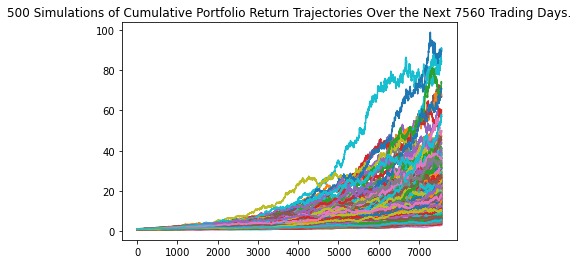

In [20]:
# Plot simulation outcomes
line_plot = MC_even_dist.plot_simulation()

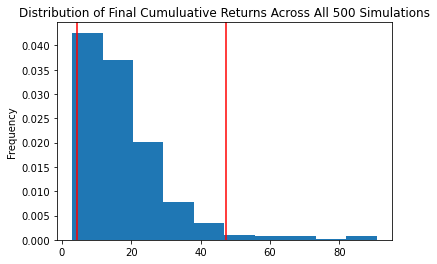

In [21]:
# Plot probability distribution and confidence intervals
dist_plot = MC_even_dist.plot_distribution()

### Retirement Analysis

In [22]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
print(even_tbl)

count           500.000000
mean             17.743321
std              12.279400
min               2.971520
25%               9.771208
50%              14.559845
75%              21.840963
max              90.708066
95% CI Lower      4.395237
95% CI Upper     47.267788
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [23]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(even_tbl[8]*20000,2)
ci_upper = round(even_tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $87904.74 and $945355.76


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [24]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(even_tbl[8]*initial_investment,2)
ci_upper = round(even_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $131857.12 and $1418033.65


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [25]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_even_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*5
)

# Print the simulation input data
MC_even_dist.portfolio_data.head()

SPY                                   \
                             open    high     low     close symbol   
timestamp                                                            
2016-05-02 04:00:00+00:00  206.90  208.18  206.41  207.9700    SPY   
2016-05-03 04:00:00+00:00  206.53  206.80  205.28  206.1592    SPY   
2016-05-04 04:00:00+00:00  204.96  205.85  204.42  205.0100    SPY   
2016-05-05 04:00:00+00:00  205.57  205.98  204.47  204.9700    SPY   
2016-05-06 04:00:00+00:00  204.08  205.77  203.88  205.7200    SPY   

                                           AGG                               \
                          daily_return    open      high       low    close   
timestamp                                                                     
2016-05-02 04:00:00+00:00          NaN  110.74  110.7400  110.5200  110.605   
2016-05-03 04:00:00+00:00    -0.008707  110.89  110.9450  110.7500  110.810   
2016-05-04 04:00:00+00:00    -0.005574  110.91  110.9315  110.7595  110.860   
2016-05-05 04:00:00+00:00    -0.000195  110.92  111.1600  110.8010  111.140   
2016-05-06 04:00:00+00:00     0.003659  111.12  111.1200  110.9700  110.970   

                                               
                          symbol daily_return  
timestamp                                      
2016-05-02 04:00:00+00:00    AGG          NaN  
2016-05-03 04:00:00+00:00    AGG     0.001853  
2016-05-04 04:00:00+00:00    AGG     0.000451  
2016-05-05 04:00:00+00:00    AGG     0.002526  
2016-05-06 04:00:00+00:00    AGG    -0.001530

In [26]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/patriciarajamanickam/FinTech/HomeWork/finance_planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.995492,0.996166,0.992138,1.000278,1.009229,1.004711,1.007047,0.992495,1.004980,0.992153,...,1.009339,0.997081,0.998545,0.995416,0.997848,1.003115,0.993949,0.994865,0.993479,1.004073
2,0.996457,0.988876,0.991851,1.005263,1.025531,1.007623,0.997965,0.999884,1.009599,0.978028,...,1.004499,0.985260,0.995234,1.000661,0.995108,0.999709,0.987341,0.989554,1.002637,0.997323
3,1.001822,0.996864,0.998226,1.011517,1.015438,1.010432,0.988156,1.006720,1.022011,0.979866,...,1.007454,0.987343,0.991308,1.003869,0.998946,0.994517,0.984178,1.008098,0.990224,0.992276
4,0.998867,0.990766,1.003335,1.027611,1.022329,1.022194,0.986054,1.021873,1.020856,0.979938,...,1.011344,0.984689,1.008867,0.985647,1.012788,0.995644,0.976741,1.012473,0.993109,0.982070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.805857,0.938846,0.940743,1.161515,1.900128,1.139807,1.015619,1.395006,1.238028,1.502702,...,2.285003,1.145015,2.052818,1.339135,1.602950,1.854182,1.914719,1.626015,2.180928,3.151249
1257,1.807696,0.936164,0.943489,1.162987,1.903277,1.135494,1.002502,1.388328,1.234916,1.490635,...,2.242721,1.141547,2.055151,1.338659,1.617240,1.860320,1.899604,1.615136,2.168618,3.184002
1258,1.795885,0.940032,0.948197,1.164943,1.906419,1.140873,1.010094,1.381052,1.237227,1.496808,...,2.248133,1.142280,2.056924,1.350782,1.648728,1.887671,1.876343,1.614171,2.169235,3.190610
1259,1.798755,0.938742,0.953238,1.164425,1.882406,1.147589,0.990765,1.387240,1.229896,1.494716,...,2.251879,1.140595,2.079985,1.338219,1.635352,1.890912,1.846978,1.613467,2.152644,3.187072


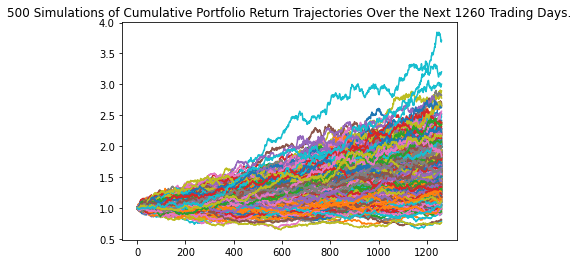

In [27]:
# Plot simulation outcomes
line_plot = MC_even_dist.plot_simulation()

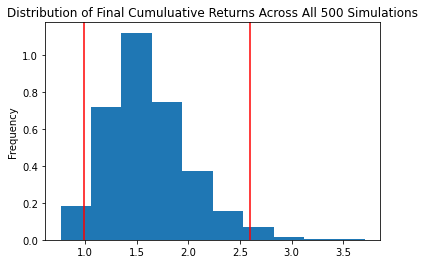

In [28]:
# Plot probability distribution and confidence intervals
dist_plot = MC_even_dist.plot_distribution()

In [29]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
print(even_tbl)

count           500.000000
mean              1.618353
std               0.407011
min               0.761126
25%               1.341254
50%               1.558317
75%               1.852448
max               3.711004
95% CI Lower      0.986943
95% CI Upper      2.598936
Name: 1260, dtype: float64


In [30]:
# Set initial investment
initial_investment = 20000 * 3

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(even_tbl[8]*initial_investment,2)
ci_upper_five = round(even_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $59216.58 and $155936.16


### Ten Years Retirement Option

In [31]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_even_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*10
)

# Print the simulation input data
MC_even_dist.portfolio_data.head()

SPY                                   \
                             open    high     low     close symbol   
timestamp                                                            
2016-05-02 04:00:00+00:00  206.90  208.18  206.41  207.9700    SPY   
2016-05-03 04:00:00+00:00  206.53  206.80  205.28  206.1592    SPY   
2016-05-04 04:00:00+00:00  204.96  205.85  204.42  205.0100    SPY   
2016-05-05 04:00:00+00:00  205.57  205.98  204.47  204.9700    SPY   
2016-05-06 04:00:00+00:00  204.08  205.77  203.88  205.7200    SPY   

                                           AGG                               \
                          daily_return    open      high       low    close   
timestamp                                                                     
2016-05-02 04:00:00+00:00          NaN  110.74  110.7400  110.5200  110.605   
2016-05-03 04:00:00+00:00    -0.008707  110.89  110.9450  110.7500  110.810   
2016-05-04 04:00:00+00:00    -0.005574  110.91  110.9315  110.7595  110.860   
2016-05-05 04:00:00+00:00    -0.000195  110.92  111.1600  110.8010  111.140   
2016-05-06 04:00:00+00:00     0.003659  111.12  111.1200  110.9700  110.970   

                                               
                          symbol daily_return  
timestamp                                      
2016-05-02 04:00:00+00:00    AGG          NaN  
2016-05-03 04:00:00+00:00    AGG     0.001853  
2016-05-04 04:00:00+00:00    AGG     0.000451  
2016-05-05 04:00:00+00:00    AGG     0.002526  
2016-05-06 04:00:00+00:00    AGG    -0.001530

In [32]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/patriciarajamanickam/FinTech/HomeWork/finance_planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999004,0.998999,0.999441,1.007317,0.985211,0.998946,0.998734,0.998144,0.993513,1.006916,...,1.007273,0.999914,1.007319,0.992397,0.982577,1.009108,0.999068,1.000776,0.999970,0.993404
2,1.006544,1.006047,1.007388,1.006076,0.978799,1.006183,0.992585,1.007361,0.996035,1.001079,...,1.003071,1.016155,1.000096,1.002471,0.984438,1.013734,0.988667,0.997008,1.008785,0.993277
3,1.014046,1.012183,0.987290,1.011145,0.977535,1.007462,1.005911,1.004980,1.003418,1.003678,...,1.004387,1.020293,1.000526,1.004519,0.979346,1.012995,0.992484,1.000255,1.007303,0.993355
4,1.020117,1.008603,0.973022,1.018321,0.969399,1.007322,1.002671,1.011787,1.002267,1.003577,...,1.016612,1.016715,1.001552,1.005287,0.979561,1.018008,1.002712,0.995533,1.008699,0.999815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.511748,2.704387,4.121000,2.968180,3.277613,1.774170,3.375035,1.909535,3.416172,4.593725,...,3.877253,5.904060,1.571459,2.576728,1.697518,4.982521,3.325464,1.945713,2.723043,2.470930
2517,2.494381,2.709944,4.149996,2.981826,3.259657,1.762168,3.355905,1.912526,3.411182,4.624685,...,3.854507,5.922245,1.550918,2.572593,1.693110,4.984478,3.362777,1.953515,2.719965,2.446463
2518,2.471553,2.705758,4.188094,2.989938,3.256934,1.750440,3.345965,1.925992,3.417747,4.634943,...,3.838394,5.981799,1.569586,2.573252,1.684857,4.998427,3.342175,1.948245,2.677355,2.485825
2519,2.475371,2.684004,4.172058,2.990253,3.285732,1.759189,3.377208,1.920131,3.433222,4.672997,...,3.775293,5.962737,1.570297,2.592217,1.692514,5.010664,3.342655,1.949337,2.655566,2.481435


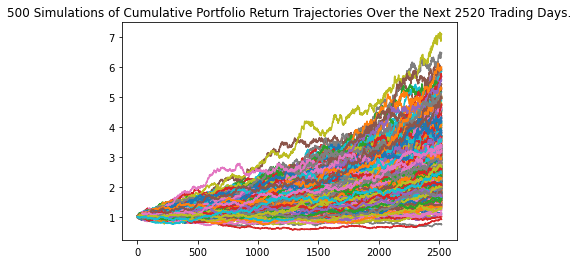

In [33]:
# Plot simulation outcomes
line_plot = MC_even_dist.plot_simulation()

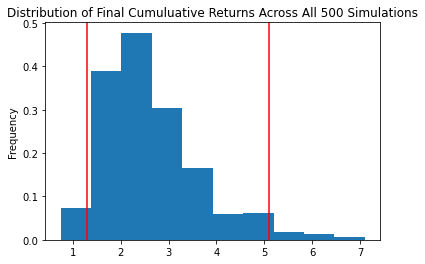

In [34]:
# Plot probability distribution and confidence intervals
dist_plot = MC_even_dist.plot_distribution()

In [35]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
print(even_tbl)

count           500.000000
mean              2.640423
std               1.002570
min               0.743042
25%               1.934069
50%               2.462341
75%               3.139994
max               7.104274
95% CI Lower      1.297211
95% CI Upper      5.103832
Name: 2520, dtype: float64


In [36]:
# Set initial investment
initial_investment = 20000 * 3


# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(even_tbl[8]*initial_investment,2)
ci_upper_ten = round(even_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $77832.67 and $306229.93
